In [1]:
%matplotlib inline
%time from hikyuu.interactive import *

Initialize hikyuu_2.6.0_202504301653_RELEASE_macosx_arm64 ...
2025-05-10 14:09:44.544 [HKU-I] - current python version: 3.10.15 (main.cpp:68)


2025-05-10 14:09:45,655 [INFO] runing in interactive session [<module>] (/Users/hy/.conda/envs/hikyuu/lib/python3.10/site-packages/hikyuu/__init__.py:127) [hikyuu::hku_info]
2025-05-10 14:09:45,655 [INFO] running in jupyter [<module>] (/Users/hy/.conda/envs/hikyuu/lib/python3.10/site-packages/hikyuu/__init__.py:134) [hikyuu::hku_info]


current plugin path: /Users/hy/.conda/envs/hikyuu/lib/python3.10/site-packages/hikyuu/plugin
2025-05-10 14:09:45.657 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:57)
2025-05-10 14:09:45.659 [HKU-I] - Loading market information... (StockManager.cpp:492)
2025-05-10 14:09:45.660 [HKU-I] - Loading stock type information... (StockManager.cpp:510)
2025-05-10 14:09:45.660 [HKU-I] - Loading stock information... (StockManager.cpp:412)
2025-05-10 14:09:45.734 [HKU-I] - Loading stock weight... (StockManager.cpp:528)
2025-05-10 14:09:45.794 [HKU-I] - Loading block... (StockManager.cpp:120)
2025-05-10 14:09:45.849 [HKU-I] - Loading KData... (StockManager.cpp:124)
2025-05-10 14:09:45.849 [HKU-I] - Preloading day kdata to buffer (max: 100000)! (StockManager.cpp:170)
2025-05-10 14:09:45.850 [HKU-I] - 0.19s Loaded Data. (StockManager.cpp:132)
CPU times: user 1.38 s, sys: 276 ms, total: 1.66 s
Wall time: 1.41 s


# 绘制组合窗口

使用 create_figure 函数快速创建查看证券K线信息的常见组合窗口
  

In [2]:
from hikyuu import *
help(create_figure)

Help on function create_figure in module hikyuu.draw.drawplot:

create_figure(n=1, figsize=None)
    生成含有指定坐标轴数量的窗口，最大只支持4个坐标轴。
    
    :param int n: 坐标轴数量
    :param figsize: (宽, 高)
    :return: (ax1, ax2, ...) 根据指定的坐标轴数量而定，超出[1,4]个坐标轴时，返回None



(<Axes: >, <Axes: >, <Axes: >, <Axes: >)

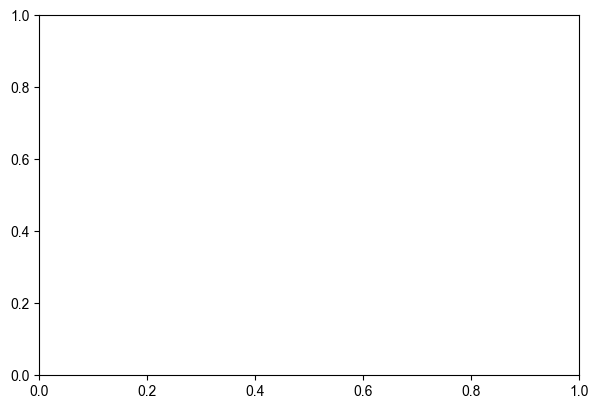

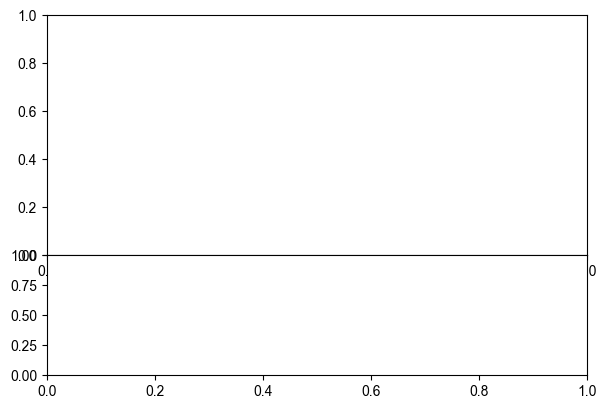

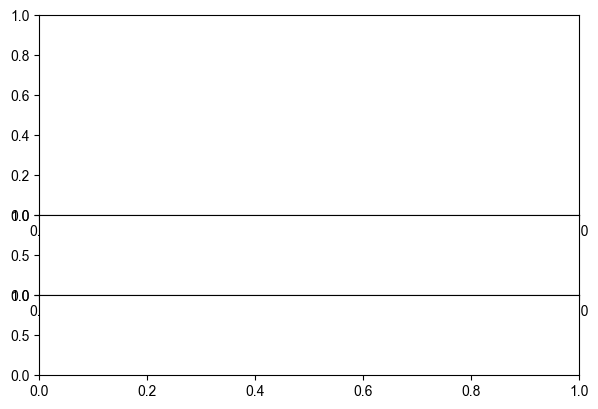

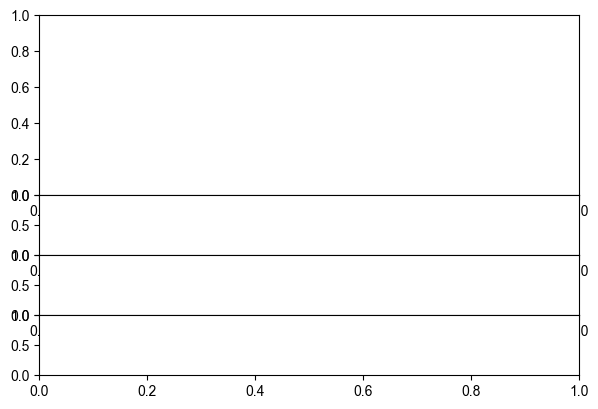

In [3]:
#不同坐标轴数量，其显示窗口布局
create_figure(figsize=(6,4))
create_figure(2, figsize=(6,4))
create_figure(3, figsize=(6,4))
create_figure(4, figsize=(6,4))

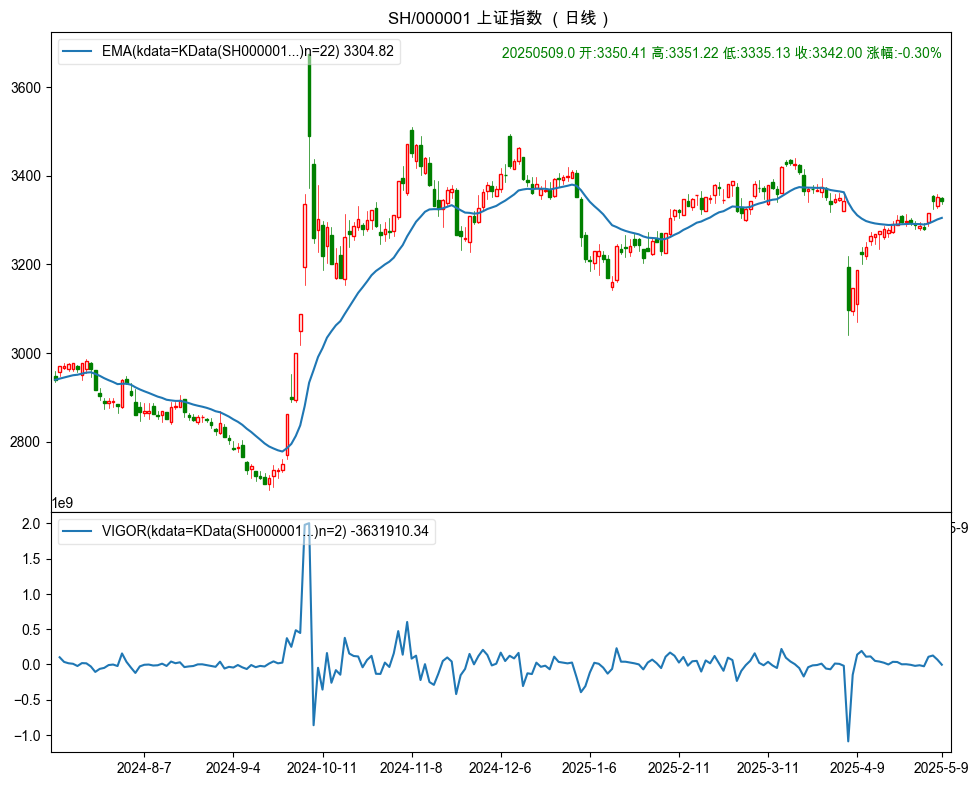

In [4]:
s = sm['sh000001']
k = s.get_kdata(Query(-200))

#创建两个显示坐标轴的窗口
ax1,ax2 = create_figure(2)

#在第一个坐标轴中绘制K线和EMA
k.plot(axes=ax1)
ma = EMA(CLOSE(k))
ma.plot(axes=ax1, legend_on=True)

#在第二个坐标轴中绘制艾尔德力度指标
v = VIGOR(k)
v.plot(axes=ax2, legend_on=True)

# 绘制MACD

绘制MACD：
- ax_draw_macd
- ax_draw_macd2

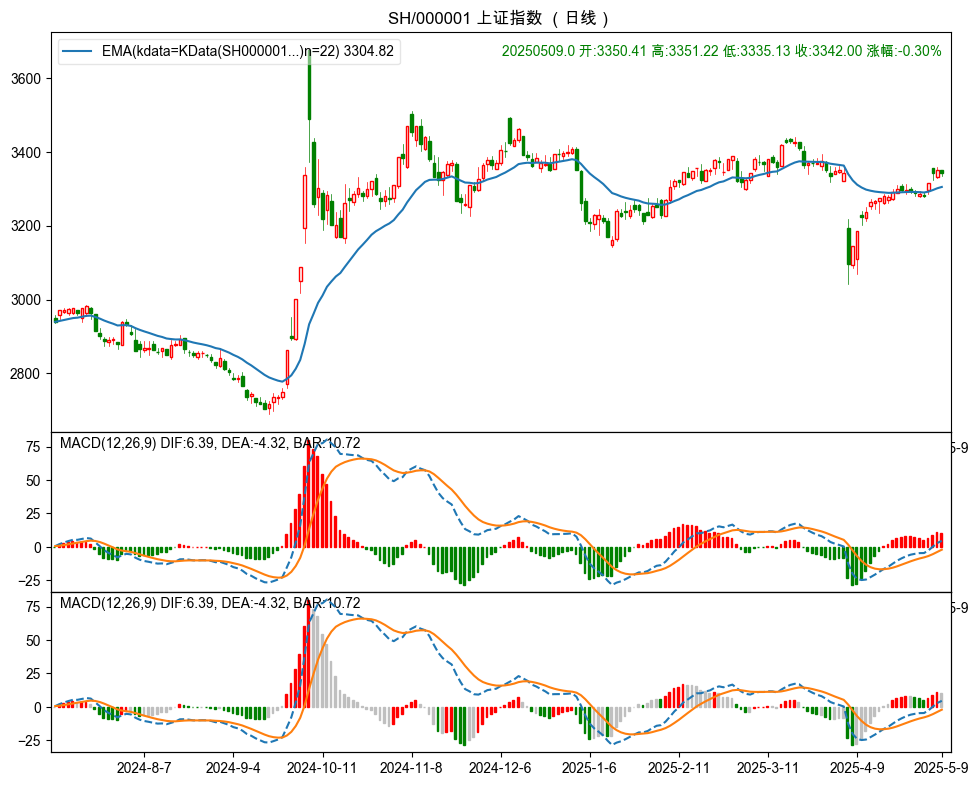

In [5]:
# 创建一个画布，画布上有3个图
ax1,ax2, ax3 = create_figure(3)

# 在画布上绘制k线图和均线图
k.plot(axes=ax1)
ma.plot(axes=ax1, legend_on=True)

# 在画布上绘制MACD图
ax_draw_macd(axes=ax2, kdata=k)
ax_draw_macd2(axes=ax3, ref=ma, kdata=k)

# 内建的三个较复杂示例

- el.draw 绘制亚历山大.艾尔德交易系统图形
- kf.draw 绘制佩里.J.考夫曼（Perry J.Kaufman） 自适应移动平均系统(AMA)
- kf.draw2 绘制佩里.J.考夫曼（Perry J.Kaufman） 自适应移动平均系统(AMA)
- vl.draw 绘制普通K线图 + 成交量（成交金额）
- vl.draw2 绘制普通K线图 + 成交量（成交金额）+ MACD


艾尔德交易系统的图形主要由以下几个部分组成：
##### 趋势指标（如MACD）：在长期时间框架上使用MACD或其他趋势指标来确认趋势方向。
##### 如果MACD向上，表示上升趋势；MACD向下，则为下降趋势。此时只在与趋势一致的方向上寻找交易机会。
+ MACD线与信号线交叉：当MACD线上穿信号线时，表明可能是一个长期趋势上升的信号；反之，下穿则可能是下降趋势的信号。
+ MACD柱状图：用于衡量趋势的强度。当柱状图变长，表明趋势强化；当柱状图变短，表明趋势减弱或反转。
##### 振荡指标（如Stochastic或RSI）：在较短的时间框架内使用振荡指标来捕捉短期的超买或超卖信号。
+ 超买和超卖区域：随机指标通常在80以上表示超买，20以下表示超卖。当随机指标从超卖区（低于20）回升时，可能意味着短期回调结束，值得考虑买入。
+ 随机指标交叉：当快速线从下向上穿过慢速线时，是买入信号；从上向下穿过则是卖出信号。
在图形中，随机指标显示为两条线的交叉。例如，在一个4小时图中，价格回调至长期上升趋势中的某一支撑位，随机指标进入超卖区域（<20），并且开始上升，这时可能是买入机会。


##### VIGOR 是一种用于衡量市场价格动能和趋势强度的指标。艾尔德的交易理念中，VIGOR 反映了价格变动背后的力量，是交易者用来判断趋势持续性或可能反转的重要参考工具。


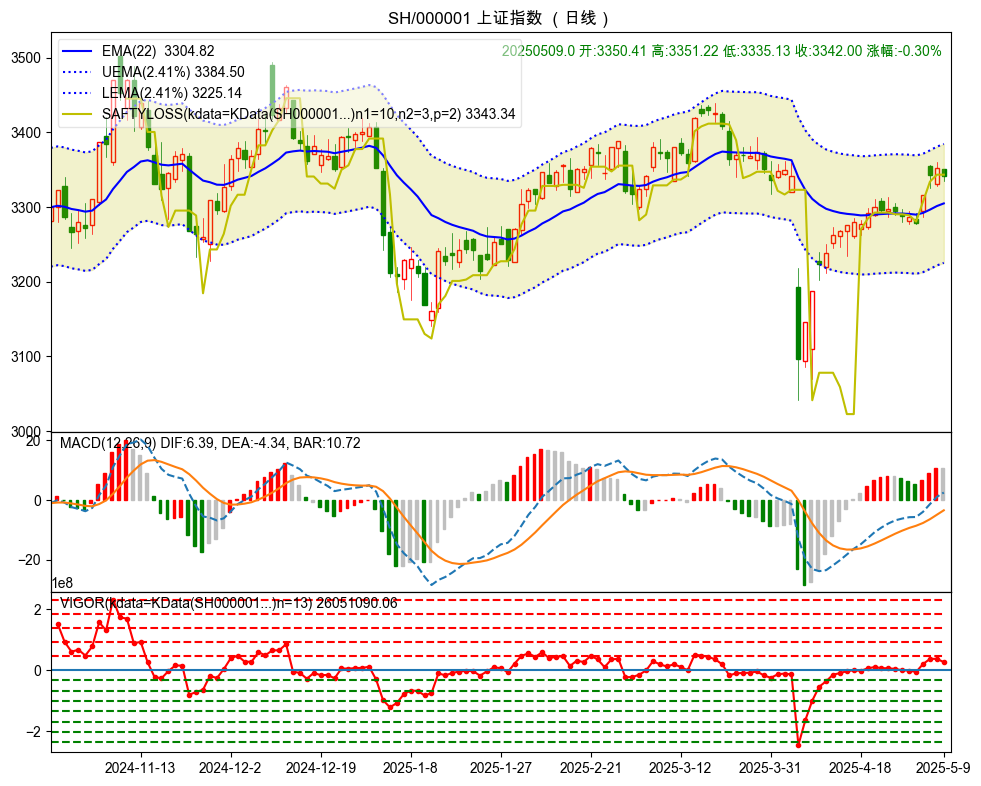

In [6]:
# 绘制亚历山大.艾尔德交易系统图形，《走进我的交易室》, 2007
el.draw(s)

/Users/hy/.conda/envs/hikyuu/lib/python3.10/site-packages/hikyuu/draw/drawplot/matplotlib_draw.py:468: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  leg = axes.legend(loc='upper left')


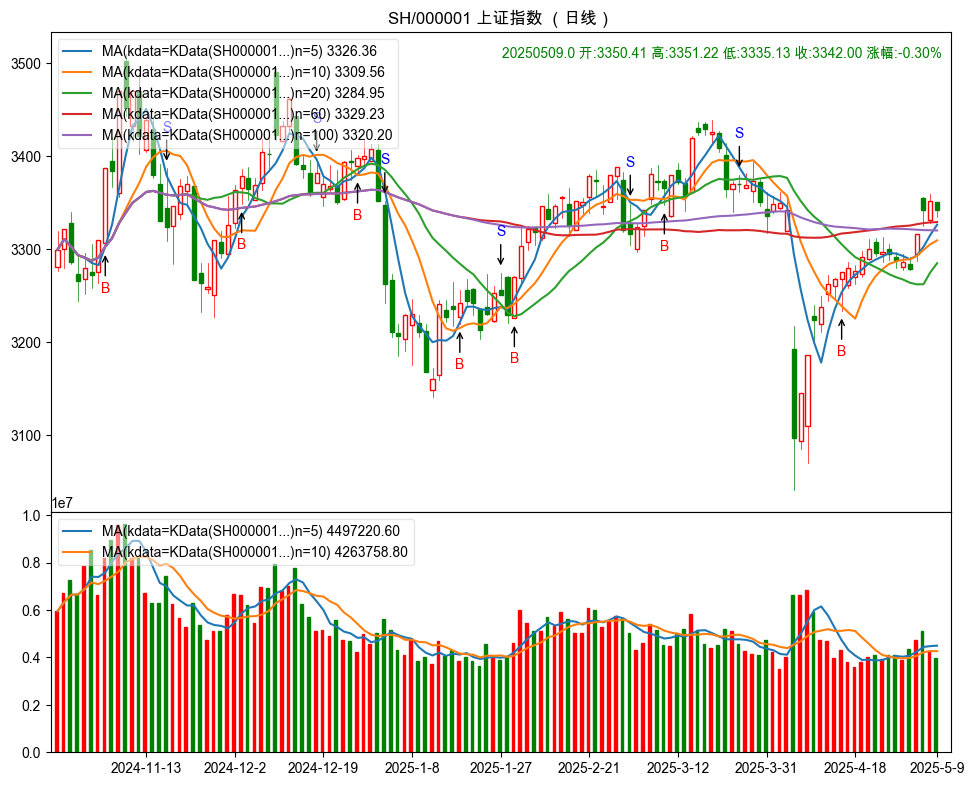

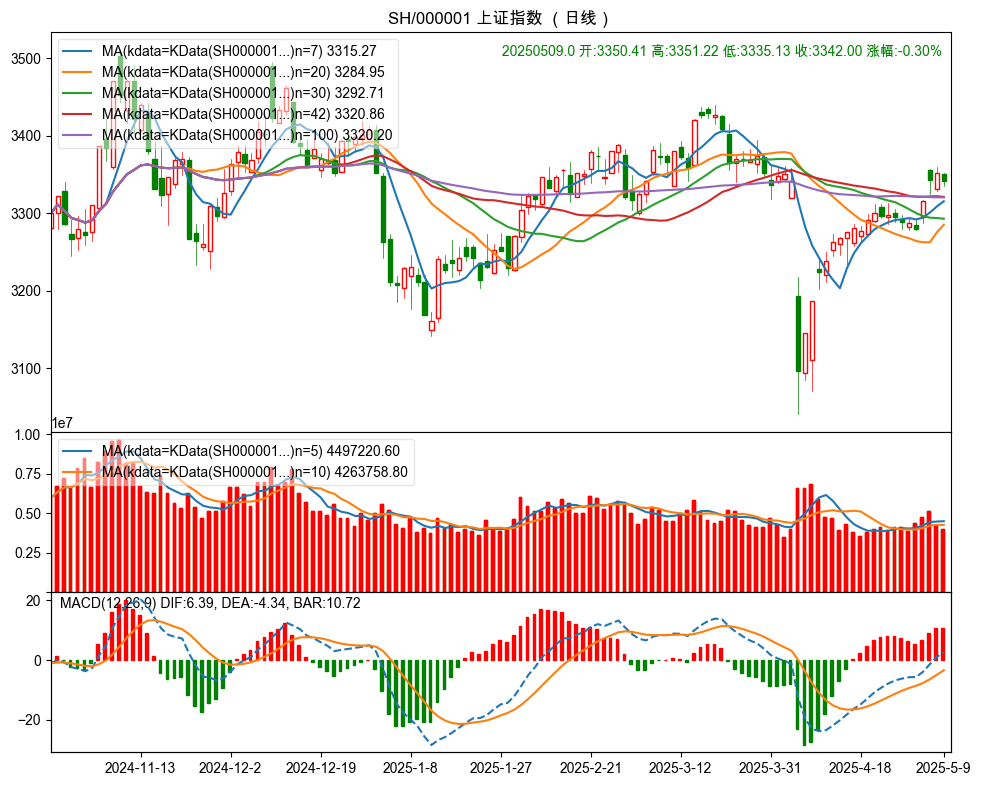

In [7]:
# 绘制普通K线图 + 成交量（成交金额）
vl.draw(s)

# 绘制普通K线图 + 成交量（成交金额）+ MACD
vl.draw2(s)

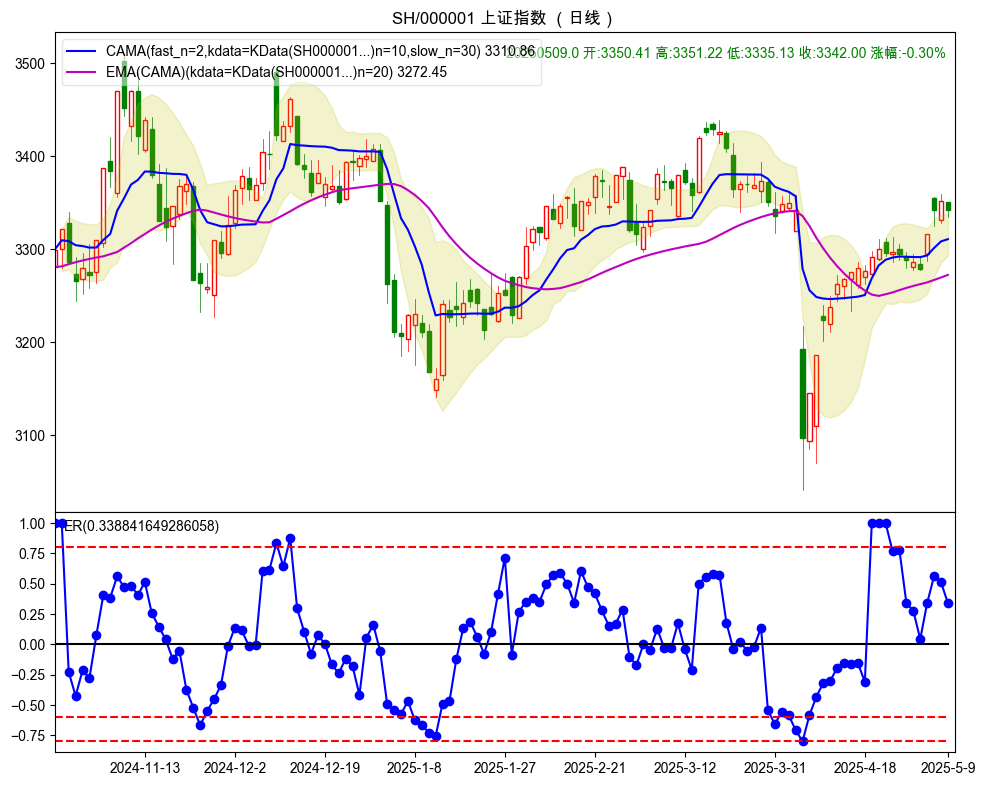

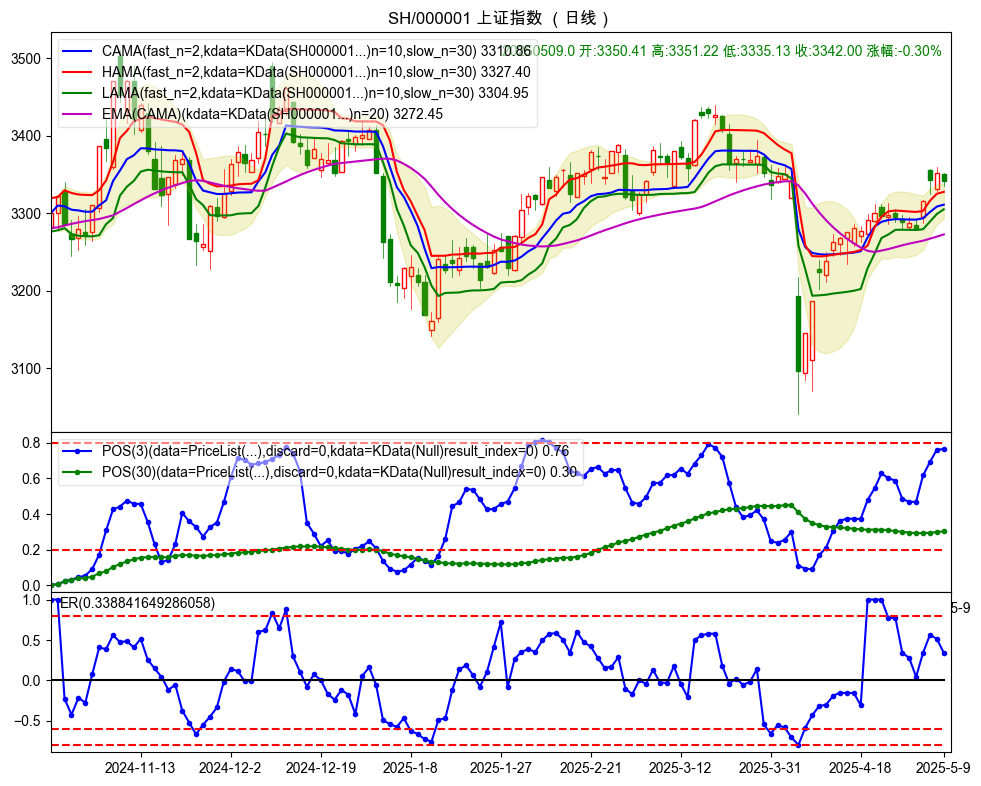

In [8]:
# 绘制佩里.J.考夫曼（Perry J.Kaufman） 自适应移动平均系统(AMA) 《精明交易者》, 2006
# 自适应移动平均（AMA）的核心思想是，根据市场的波动性和趋势强度，来动态调整移动平均的平滑系数，从而在不同的市场条件下优化其性能。
# AMA采用的是一个**有效趋势比率（Efficiency Ratio，ER）**来衡量市场的趋势强度。有效趋势比率的取值介于0和1之间，数值越接近1，表示市场的趋势越强；数值越接近0，表示市场震荡或噪音较多。
kf.draw(s)

# 绘制佩里.J.考夫曼（Perry J.Kaufman） 自适应移动平均系统(AMA) 《精明交易者》, 2006
kf.draw2(blocka)